In [42]:
## project work distribution:
## Machine learning:Aditya Gupta
## Data Mapping:Aryan Ambare
## Cleaning the data:Abhishek Warambhe
## Training and Testing the data:Juhi Borkar

In [50]:
import pandas as pd
import numpy as np
import os

os.chdir('C:\\Users\\Aditya Gupta\\OneDrive\\Desktop\\Bank Loan\\Data')

train = pd.read_csv('C:\\Users\\Aditya Gupta\\OneDrive\\Desktop\\Bank Loan\\train.csv')
train.Loan_Status = train.Loan_Status.map({'Y':1, 'N':0})
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [51]:
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [52]:
binary_col = train['Loan_Status']

# Count the number of 0's and 1's in the column
counts = binary_col.value_counts()

# Store the counts in a new variable or dictionary
num_zeros = counts[0]
num_ones = counts[1]

print("Number of zeros in the column:", num_zeros)
print("Number of ones in the column:", num_ones)

Number of zeros in the column: 192
Number of ones in the column: 422


In [53]:
Loan_status = train.Loan_Status
train.drop('Loan_Status', axis=1, inplace=True)
test = pd.read_csv('C:\\Users\\Aditya Gupta\\OneDrive\\Desktop\\Bank Loan\\test.csv')
Loan_ID = test.Loan_ID
data = pd.concat([train, test], ignore_index=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [54]:
data.shape

(981, 12)

In [55]:
data.Gender=data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [56]:
data.Married=data.Married.map({'Yes':1,'No':0})

In [57]:
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [58]:
data.Dependents=data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [59]:
data.Dependents.value_counts()

0.0    545
1.0    160
2.0    160
3.0     91
Name: Dependents, dtype: int64

In [60]:
data.Education=data.Education.map({'Graduate':1,'Not Graduate':0})

In [61]:
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [62]:
data.Self_Employed=data.Self_Employed.map({'Yes':1,'No':0})

In [63]:
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [64]:
data.Property_Area=data.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})

In [65]:
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

In [66]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [67]:
data.Credit_History.size

981

In [68]:
data.Credit_History.fillna(np.random.randint(0,2),inplace=True)

In [69]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [70]:
data.Married.fillna(np.random.randint(0,2),inplace=True)

In [71]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History        0
Property_Area         0
dtype: int64

In [72]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [73]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [74]:
data.isnull().sum()

Loan_ID               0
Gender               24
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [75]:
from random import randint 
data.Gender.fillna(np.random.randint(0,2),inplace=True)

In [76]:
data.Gender.value_counts()

1.0    799
0.0    182
Name: Gender, dtype: int64

In [77]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [78]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [79]:
data.Self_Employed.fillna(np.random.randint(0,2),inplace=True)

In [80]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [81]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [82]:
data.drop('Loan_ID',inplace=True,axis=1)

In [83]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [84]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [85]:
train_X=data.iloc[:614,] 
train_y=Loan_status  

In [86]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(train_X,train_y,random_state=0)

In [87]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,1.0,1.0,1.0,1,0.0,5649,0.0,44.0,360.0,1.0,2
272,1.0,0.0,0.0,1,0.0,2833,1857.0,126.0,360.0,1.0,0
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,0
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
283,0.0,0.0,0.0,1,0.0,1811,1666.0,54.0,360.0,1.0,2


In [88]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


In [89]:
corr_matrix = train.corr()

<AxesSubplot:>

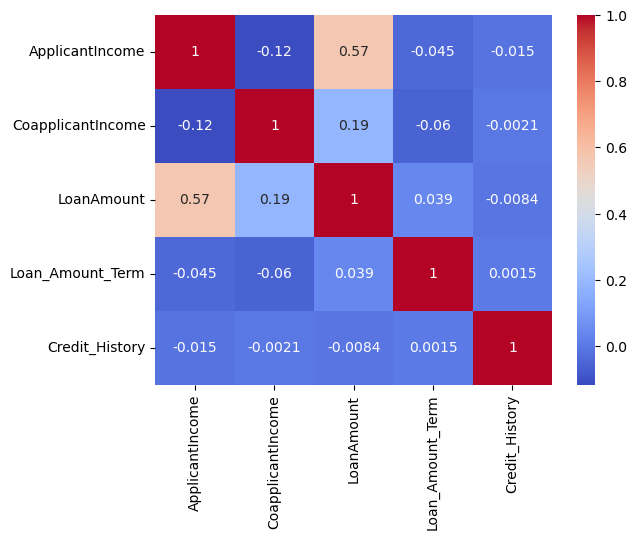

In [90]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [92]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [93]:
scoring='accuracy'

In [94]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [95]:
for name,model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_result=cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name,cv_result.mean()))

C:\Users\Aditya Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aditya Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

LogisticRegression()
Logistic Regression 0.802174
DecisionTreeClassifier()
Decision Tree 0.691304
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.802174
RandomForestClassifier()
Random Forest 0.782609
SVC()
Support Vector Classifier 0.671739
KNeighborsClassifier()
K- Neirest Neighbour 0.643478
GaussianNB()
Naive Bayes 0.791304


C:\Users\Aditya Gupta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aditya Gupta\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR=LogisticRegression()
LR.fit(train_X,train_y)
pred=LR.predict(test_X)
print("Model Accuracy:- ",accuracy_score(test_y,pred))
print(confusion_matrix(tr_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:-  0.8376623376623377
[[ 20  23]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



In [97]:
print(pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]


In [98]:
X_test=data.iloc[614:,] 

In [99]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.0,1,0.0,5720,0.0,110.0,360.0,1.0,2
615,1.0,1.0,1.0,1,0.0,3076,1500.0,126.0,360.0,1.0,2
616,1.0,1.0,2.0,1,0.0,5000,1800.0,208.0,360.0,1.0,2
617,1.0,1.0,2.0,1,0.0,2340,2546.0,100.0,360.0,1.0,2
618,1.0,0.0,0.0,0,0.0,3276,0.0,78.0,360.0,1.0,2


In [100]:
prediction = LR.predict(X_test)

In [101]:
print(prediction)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [103]:
import pickle
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris = load_iris()


svc = SVC(kernel='linear', C=1, random_state=42)


svc.fit(iris.data, iris.target)

filename = "C:/Users/Aditya Gupta/OneDrive/Desktop/Bank Loan/Model/ML_Model.pkl"

with open(filename, 'wb') as f:
    pickle.dump(svc, f)


In [ ]:
with open(filename, 'rb') as f:
    k = pickle.load(f)

In [56]:
cy = LR.predict([[0.0,	0.0,	0.0,	1,	0.0,	4230,	0.0,	112.0,	360.0,	1.0,	1]])
print(cy)

[1]


C:\Users\Aditya Gupta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
